In [3]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [4]:
actions = [
    'come',
    'away',
    'spin'
]

data = np.concatenate([
    np.load('dataset/seq_cat_1676642588.npy'), #각 데이터셋을 불러오고 하나로 합친다.
    np.load('dataset/seq_cow_1676642588.npy'),
    np.load('dataset/seq_dog_1676642588.npy')
], axis=0)

data.shape

(1211, 30, 100)

In [5]:
x_data = data[:, :, :-1] #라벨값을 뺀 나머지는 데이터
labels = data[:, 0, -1] #마지막 라벨값을 분리한다.

print(x_data.shape)
print(labels.shape)

(1211, 30, 99)
(1211,)


In [6]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions)) #one hot encoding 처리
y_data.shape

(1211, 3)

In [7]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)
# 9:1 로 트레이닝, 테스트데이터를 분리한다.
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1089, 30, 99) (1089, 3)
(122, 30, 99) (122, 3)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])
#모델 정의 , LSTM 64개의 노드와 Dense를 연결한다.
# Dense의 경우 32노드
# 활성화 함수는 softMax , loss는 크로스엔트로피 사용

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                41984     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


2023-02-17 23:06:55.091574: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 23:06:55.092966: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

#ModelCheckpoint : 모델저장 (models/model.h5경로로 저장하겠다) , ReduceLROnPlateau : 학습률 조절

Train on 1089 samples, validate on 122 samples
Epoch 1/200
1088/1089 [============================>.] - ETA: 0s - loss: 20.9951 - acc: 0.4439
Epoch 00001: val_acc improved from -inf to 0.44262, saving model to models/model2.h5
1089/1089 [==============================] - 10s 9ms/sample - loss: 21.0116 - acc: 0.4435 - val_loss: 22.5513 - val_acc: 0.4426
Epoch 2/200
1088/1089 [============================>.] - ETA: 0s - loss: 16.8498 - acc: 0.4357
Epoch 00002: val_acc improved from 0.44262 to 0.54098, saving model to models/model2.h5
1089/1089 [==============================] - 8s 7ms/sample - loss: 16.8344 - acc: 0.4362 - val_loss: 8.1067 - val_acc: 0.5410
Epoch 3/200
1088/1089 [============================>.] - ETA: 0s - loss: 14.5590 - acc: 0.4789
Epoch 00003: val_acc did not improve from 0.54098
1089/1089 [==============================] - 7s 6ms/sample - loss: 14.5760 - acc: 0.4784 - val_loss: 15.6416 - val_acc: 0.4836
Epoch 4/200
1088/1089 [============================>.] - ETA: 0s

1088/1089 [============================>.] - ETA: 0s - loss: 185.8208 - acc: 0.3676
Epoch 00030: val_acc did not improve from 0.63115
1089/1089 [==============================] - 6s 5ms/sample - loss: 185.7457 - acc: 0.3673 - val_loss: 95.1518 - val_acc: 0.4180
Epoch 31/200
1088/1089 [============================>.] - ETA: 0s - loss: 117.3327 - acc: 0.3704
Epoch 00031: val_acc did not improve from 0.63115
1089/1089 [==============================] - 6s 5ms/sample - loss: 117.3387 - acc: 0.3701 - val_loss: 74.4434 - val_acc: 0.4180
Epoch 32/200
1088/1089 [============================>.] - ETA: 0s - loss: 101.3418 - acc: 0.3483
Epoch 00032: val_acc did not improve from 0.63115
1089/1089 [==============================] - 7s 7ms/sample - loss: 101.3537 - acc: 0.3480 - val_loss: 308.4618 - val_acc: 0.3525
Epoch 33/200
1088/1089 [============================>.] - ETA: 0s - loss: 247.5990 - acc: 0.3575
Epoch 00033: val_acc did not improve from 0.63115
1089/1089 [=============================

Epoch 60/200
1088/1089 [============================>.] - ETA: 0s - loss: 15.6222 - acc: 0.5836
Epoch 00060: val_acc did not improve from 0.63115
1089/1089 [==============================] - 7s 7ms/sample - loss: 15.6078 - acc: 0.5840 - val_loss: 18.9874 - val_acc: 0.3361
Epoch 61/200
1088/1089 [============================>.] - ETA: 0s - loss: 14.1751 - acc: 0.5873
Epoch 00061: val_acc did not improve from 0.63115
1089/1089 [==============================] - 9s 8ms/sample - loss: 14.1621 - acc: 0.5877 - val_loss: 24.1780 - val_acc: 0.5328
Epoch 62/200
1088/1089 [============================>.] - ETA: 0s - loss: 13.5896 - acc: 0.5735
Epoch 00062: val_acc did not improve from 0.63115
1089/1089 [==============================] - 7s 7ms/sample - loss: 13.5771 - acc: 0.5739 - val_loss: 23.2387 - val_acc: 0.2869
Epoch 63/200
1088/1089 [============================>.] - ETA: 0s - loss: 13.7769 - acc: 0.5901
Epoch 00063: val_acc did not improve from 0.63115
1089/1089 [========================

Epoch 90/200
1088/1089 [============================>.] - ETA: 0s - loss: 5.9453 - acc: 0.6893
Epoch 00090: val_acc did not improve from 0.71311
1089/1089 [==============================] - 9s 8ms/sample - loss: 5.9399 - acc: 0.6896 - val_loss: 4.5763 - val_acc: 0.7131
Epoch 91/200
1088/1089 [============================>.] - ETA: 0s - loss: 4.1988 - acc: 0.7114
Epoch 00091: val_acc improved from 0.71311 to 0.72131, saving model to models/model2.h5
1089/1089 [==============================] - 11s 10ms/sample - loss: 4.1949 - acc: 0.7117 - val_loss: 3.5998 - val_acc: 0.7213
Epoch 92/200
1088/1089 [============================>.] - ETA: 0s - loss: 4.8128 - acc: 0.6985
Epoch 00092: val_acc did not improve from 0.72131
1089/1089 [==============================] - 8s 7ms/sample - loss: 4.8212 - acc: 0.6979 - val_loss: 12.0814 - val_acc: 0.6066
Epoch 93/200
1088/1089 [============================>.] - ETA: 0s - loss: 12.1314 - acc: 0.5754
Epoch 00093: val_acc did not improve from 0.72131
108

Epoch 120/200
1088/1089 [============================>.] - ETA: 0s - loss: 6.3194 - acc: 0.6691
Epoch 00120: val_acc did not improve from 0.75410
1089/1089 [==============================] - 10s 10ms/sample - loss: 6.3136 - acc: 0.6694 - val_loss: 5.3448 - val_acc: 0.7541
Epoch 121/200
1088/1089 [============================>.] - ETA: 0s - loss: 6.5404 - acc: 0.6608
Epoch 00121: val_acc did not improve from 0.75410
1089/1089 [==============================] - 16s 15ms/sample - loss: 6.5344 - acc: 0.6612 - val_loss: 10.1176 - val_acc: 0.7049
Epoch 122/200
1088/1089 [============================>.] - ETA: 0s - loss: 6.8345 - acc: 0.6820
Epoch 00122: val_acc did not improve from 0.75410
1089/1089 [==============================] - 10s 9ms/sample - loss: 6.8539 - acc: 0.6814 - val_loss: 77.5200 - val_acc: 0.2951
Epoch 123/200
1088/1089 [============================>.] - ETA: 0s - loss: 40.4761 - acc: 0.5478
Epoch 00123: val_acc did not improve from 0.75410
1089/1089 [======================

Epoch 150/200
1088/1089 [============================>.] - ETA: 0s - loss: 5.1872 - acc: 0.7243
Epoch 00150: val_acc did not improve from 0.81148
1089/1089 [==============================] - 9s 8ms/sample - loss: 5.1825 - acc: 0.7245 - val_loss: 9.0404 - val_acc: 0.7295
Epoch 151/200
1088/1089 [============================>.] - ETA: 0s - loss: 5.7252 - acc: 0.7188
Epoch 00151: val_acc did not improve from 0.81148
1089/1089 [==============================] - 13s 12ms/sample - loss: 5.7274 - acc: 0.7181 - val_loss: 14.6052 - val_acc: 0.6885
Epoch 152/200
1088/1089 [============================>.] - ETA: 0s - loss: 10.2950 - acc: 0.7040
Epoch 00152: val_acc did not improve from 0.81148
1089/1089 [==============================] - 7s 7ms/sample - loss: 10.2856 - acc: 0.7043 - val_loss: 2.9699 - val_acc: 0.7787
Epoch 153/200
1088/1089 [============================>.] - ETA: 0s - loss: 4.3138 - acc: 0.7491
Epoch 00153: val_acc did not improve from 0.81148
1089/1089 [=========================

Epoch 180/200
1088/1089 [============================>.] - ETA: 0s - loss: 4.7735 - acc: 0.7417
Epoch 00180: val_acc did not improve from 0.81967
1089/1089 [==============================] - 7s 7ms/sample - loss: 4.7691 - acc: 0.7420 - val_loss: 5.1916 - val_acc: 0.7787
Epoch 181/200
1088/1089 [============================>.] - ETA: 0s - loss: 4.7661 - acc: 0.7537
Epoch 00181: val_acc did not improve from 0.81967
1089/1089 [==============================] - 7s 6ms/sample - loss: 4.7618 - acc: 0.7539 - val_loss: 2.7698 - val_acc: 0.7951
Epoch 182/200
1088/1089 [============================>.] - ETA: 0s - loss: 5.1527 - acc: 0.7574
Epoch 00182: val_acc did not improve from 0.81967
1089/1089 [==============================] - 6s 6ms/sample - loss: 5.1480 - acc: 0.7576 - val_loss: 4.3401 - val_acc: 0.6721
Epoch 183/200
1088/1089 [============================>.] - ETA: 0s - loss: 3.9605 - acc: 0.7739
Epoch 00183: val_acc did not improve from 0.81967
1089/1089 [==============================

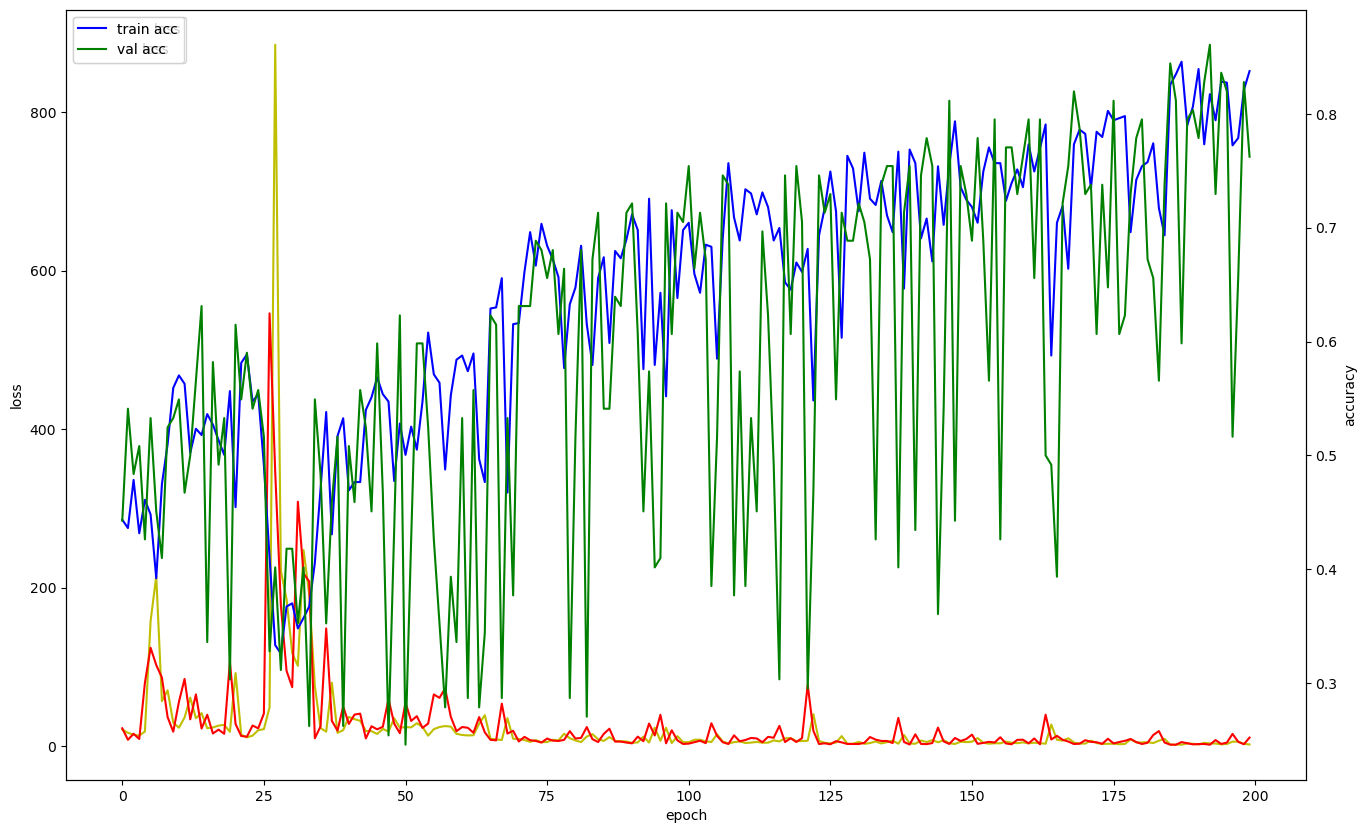

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model2.h5')
#모델을 불러온다.
y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[74,  5],
        [ 6, 37]],

       [[87,  5],
        [ 9, 21]],

       [[66,  7],
        [ 2, 47]]])